In [8]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from celluloid import Camera
import numpy as np
import math
from IPython.display import HTML

# Logo in 2D

In [2]:
# con questa scelta: triangolo rettangolo metà di un triangolo equilatero
alpha = math.pi/3
l = 4 

In [3]:
# ruota il segmento di estremi (ptx,pty) di pi/2 attorno (cx,cy)
def ruota(ptx,pty,cx,cy,verso):
    x = ptx-cx
    y = pty-cy
    px = -verso*y+cx
    py = verso*x+cy
    return (px, py)

In [4]:
def triangoloequadrati(x,y,x1,y1):
    # primo cateto
    lato = math.sqrt((x-x1)**2+(y-y1)**2)   
    if lato > dettaglio:
        bx = (x-x1)*(math.cos(alpha))**2
        by = (y-y1)*(math.cos(alpha))**2
        (nx,ny) = ruota(bx,by,0,0,-1)
        ax = nx*math.tan(alpha)
        ay = ny*math.tan(alpha)
        x2 = x1+bx+ax
        y2 = y1+by+ay
        (q2x, q2y) = ruota(x2,y2,x,y,1)
        (q3x, q3y) = ruota(x,y,q2x,q2y,1)
        plt.plot([x,x1,x2,x],[y,y1,y2,y],'k-')
        plt.plot([x,q2x],[y,q2y],'b-')
        plt.plot([q2x,q3x],[q2y,q3y],'b-')
        plt.plot([q3x,x1],[q3y,y1],'b-')
        # secondo cateto
        (r2x, r2y) = ruota(x2,y2,x1,y1,-1)
        (r3x, r3y) = ruota(x1,y1,r2x,r2y,-1)
        plt.plot([x1,r2x],[y1,r2y],'b-')
        plt.plot([r2x,r3x],[r2y,r3y],'b-')
        plt.plot([r3x,x2],[r3y,y2],'b-')
        # chiamata ricorsiva
        triangoloequadrati(r3x,r3y,r2x,r2y)
        triangoloequadrati(q2x,q2y,q3x,q3y)
    else:
        return 1

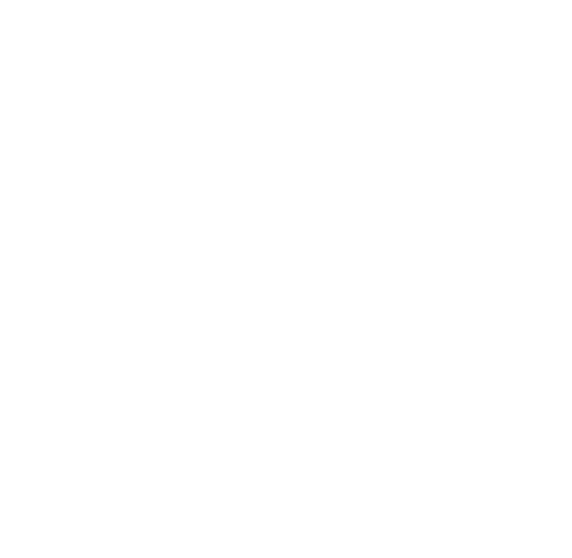

In [13]:
# lunghezza dell'ipotenusa del triangolo più piccolo
dettaglio = 3.5
dx = 0.1
n = int((3.5-0.05)/dx)
# costruzione figura
figura = plt.figure(figsize=(10,10))
camera = Camera(figura)
#figura,fin = plt.subplots(1, 1,figsize=(10, 10))
plt.axis('equal')
plt.axis('off')
for i in range(0,n):
    triangoloequadrati(0,0,l,0)
    dettaglio -= dx
    camera.snap()
anim = camera.animate()
# anim = FuncAnimation(figura,update,frames=ilnum, init_func=init, blit=False)
HTML(anim.to_jshtml())
#anim.save('logoJ2D.mp4')
#plt.show()
#plt.savefig('logo2D.png')